In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

## ABCD data

In [2]:
cbcl = pd.read_csv("/data5/open_data/ABCD/4.0/Package_1197040/abcd_cbcl01.txt",sep='\t',low_memory=False)

In [3]:
year0 = cbcl.loc[cbcl['eventname']=="baseline_year_1_arm_1",:]
year1 = cbcl.loc[cbcl['eventname']=="1_year_follow_up_y_arm_1",:]
year2 = cbcl.loc[cbcl['eventname']=="2_year_follow_up_y_arm_1",:]
year3 = cbcl.loc[cbcl['eventname']=="3_year_follow_up_y_arm_1",:]

year0.shape, year1.shape, year2.shape, year3.shape

((11876, 131), (11225, 131), (10414, 131), (6251, 131))

In [4]:
cbcl_int = cbcl[1:]
cbcl_int['interview_age'] = cbcl_int['interview_age'].astype('int')
cbcl_int.rename(columns={"subjectkey":"new_id","interview_age":"age"},inplace=True)
cbcl_int.set_index("new_id",drop=True,inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## SNUH data

In [5]:
cur_sbj_list = np.load("/data4/SNU/data/cur_sbj_list.npz")["X"]
cur_sbj_list.shape

(125,)

In [6]:
demo_df = pd.read_csv("/data4/SNU/data/new_demo_df.csv", index_col=0)
demo_df.set_index("new_id",drop=True,inplace=True)
demo_df = demo_df.loc[cur_sbj_list]
demo_df['age'] = demo_df['age']*12
demo_df['eventname'] = "SNUH"

## Concat

In [7]:
total_df = pd.concat([cbcl_int,demo_df],join='inner')

<AxesSubplot:xlabel='age', ylabel='Density'>

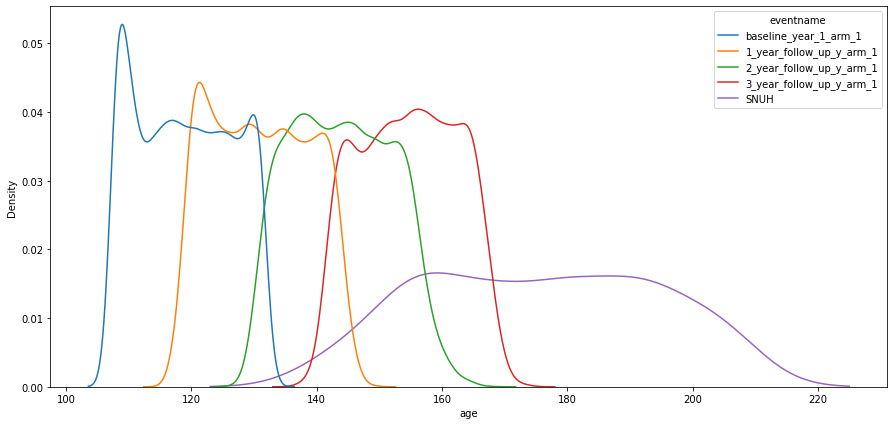

In [8]:
plt.figure(figsize=(15,7))
sns.kdeplot(x='age',data=total_df,common_norm=False,
            hue='eventname',
            hue_order = ['baseline_year_1_arm_1','1_year_follow_up_y_arm_1',
                '2_year_follow_up_y_arm_1','3_year_follow_up_y_arm_1',"SNUH"])

<AxesSubplot:xlabel='eventname', ylabel='age'>

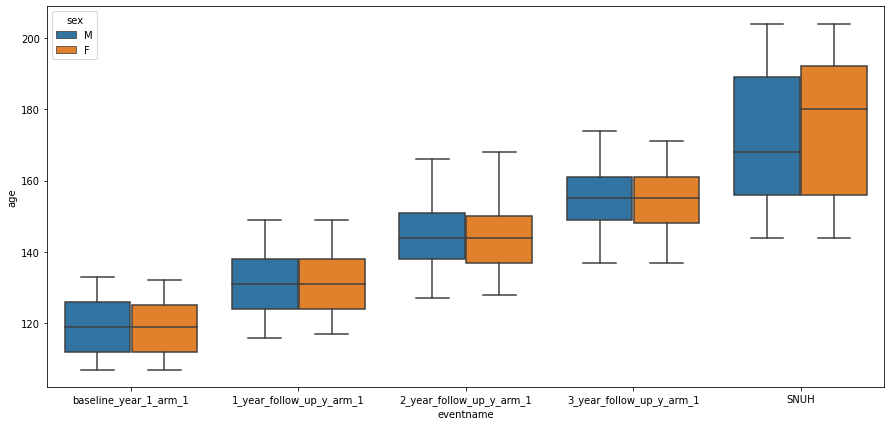

In [9]:
plt.figure(figsize=(15,7))
sns.boxplot(x='eventname',y='age',data= total_df,hue='sex',
           order = ['baseline_year_1_arm_1','1_year_follow_up_y_arm_1',
                                        '2_year_follow_up_y_arm_1','3_year_follow_up_y_arm_1',"SNUH"]
           )